In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


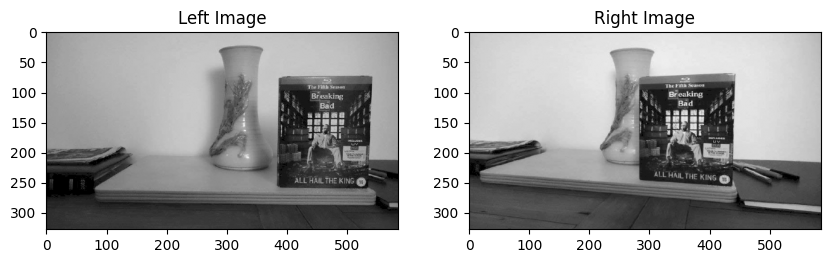

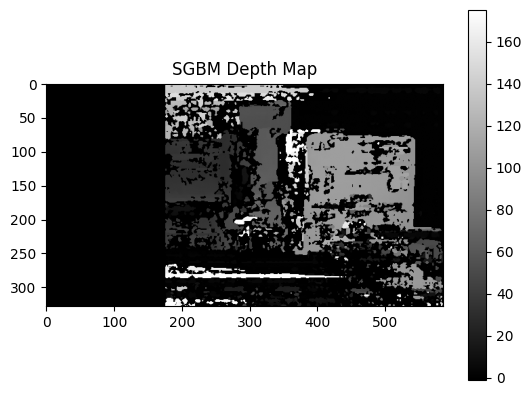

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

class DepthMap:
    def __init__(self, showImages):
        # مسیر تصاویر در Google Drive
        pathL = '/content/drive/My Drive/images/imgL.png'
        pathR = '/content/drive/My Drive/images/imgR.png'

        # بارگذاری تصاویر در مقیاس خاکستری
        self.imgLeft = cv2.imread(pathL, cv2.IMREAD_GRAYSCALE)
        self.imgRight = cv2.imread(pathR, cv2.IMREAD_GRAYSCALE)

        if self.imgLeft is None or self.imgRight is None:
            raise FileNotFoundError("Ensure imgL.png and imgR.png exist in the specified Drive path.")

        # اطمینان از یکسان بودن اندازه‌ها
        self.imgRight = cv2.resize(self.imgRight, (self.imgLeft.shape[1], self.imgLeft.shape[0]))

        if showImages:
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(self.imgLeft, cmap='gray')
            plt.title('Left Image')
            plt.subplot(1, 2, 2)
            plt.imshow(self.imgRight, cmap='gray')
            plt.title('Right Image')
            plt.show()

    def computeDepthMapSGBM(self):
        window_size = 7
        min_disp = 16
        nDispFactor = 12
        num_disp = 16 * nDispFactor - min_disp

        stereo = cv2.StereoSGBM_create(
            numDisparities=num_disp,
            blockSize=window_size,
            P1=8 * 3 * window_size ** 2,
            P2=32 * 3 * window_size ** 2,
            disp12MaxDiff=1,
            uniquenessRatio=10,
            speckleWindowSize=0,
            speckleRange=2,
            preFilterCap=63,
            mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
        )

        disparity = stereo.compute(self.imgLeft, self.imgRight).astype(np.float32) / 16.0

        plt.imshow(disparity, cmap='gray')
        plt.colorbar()
        plt.title("SGBM Depth Map")
        plt.show()

# اجرای نمونه
dp = DepthMap(showImages=True)
dp.computeDepthMapSGBM()
